In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [2]:
pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
challenger_usa_space_shuttle_o_ring = fetch_ucirepo(id=92)

# data (as pandas dataframes)
X = challenger_usa_space_shuttle_o_ring.data.features
Y = challenger_usa_space_shuttle_o_ring.data.targets

# metadata
print(challenger_usa_space_shuttle_o_ring.metadata)

# variable information
print(challenger_usa_space_shuttle_o_ring.variables)

{'uci_id': 92, 'name': 'Challenger USA Space Shuttle O-Ring', 'repository_url': 'https://archive.ics.uci.edu/dataset/92/challenger+usa+space+shuttle+o+ring', 'data_url': 'https://archive.ics.uci.edu/static/public/92/data.csv', 'abstract': 'Task: predict the number of O-rings that experience thermal distress on a flight at 31 degrees F given data on the previous 23 shuttle flights', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 23, 'num_features': 4, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['num_O_rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5PW2T', 'creators': ['David Draper'], 'intro_paper': None, 'additional_info': {'summary': 'There are two databases: (both use the same set of 5 attributes):\r\n1. Primary o-ring erosion and/or blowby\r\n2. Primary o-ring erosi

In [12]:
df = pd.concat([X['leak_check_pressure'], Y['num_O_rings']], axis=1)

# Fill missing values, if any
df.fillna(method='ffill', inplace=True)

<ipython-input-12-4d7daa6b42d6>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

Model R-squared score: 1.0


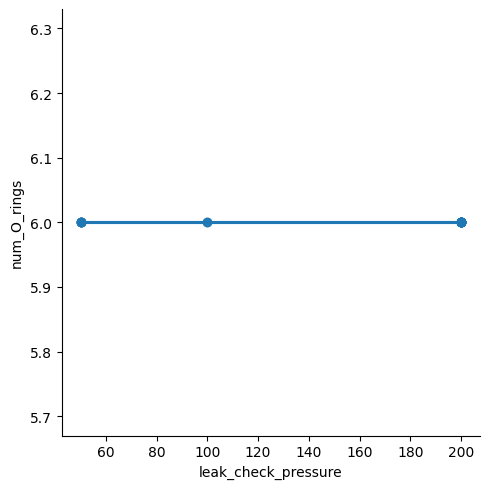

In [13]:
sns.lmplot(x="leak_check_pressure", y="num_O_rings", data=df, order=2, ci=None)
X = np.array(df['leak_check_pressure']).reshape(-1, 1)
y = np.array(df['num_O_rings']).reshape(-1, 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

# Print the R-squared score of the model on the test set
print(f"Model R-squared score: {regr.score(X_test, y_test)}")